# Number Partitioning

Given a list $a_1$, $a_2$, ..., $a_n$ $\in\mathbb{Z}^{+}$ fina a subset $A$ such that $\vert \Sigma_{a_i\in A} a_i  - \Sigma_{a_i\notin A} a_i \vert$ is minimized.

In [ ]:
!pip install git+https://github.com/maxtuno/peqnp-lib
!pip install matplotlib

In [82]:
import time
import random
import peqnp
import matplotlib.pyplot as plt

The $size$ and $bits$ for the sample set.

In [87]:
bits = 10
size = 100

The data generator and ploter of data

In [88]:
def plot(S, c=None):
    for s in S:
        if c:
            plt.bar(s, s, color=c, alpha=0.7)
        else:
            plt.bar(s, s, color='g', alpha=0.7)
    plt.show()
    
def gen_data():
    return sorted([random.randint(1, 2 ** bits) for _ in range(size)])

Generate the the sample set.

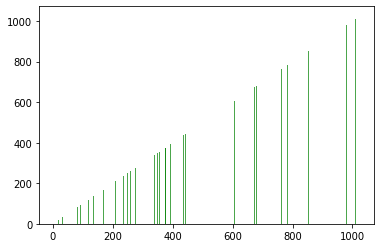

[6, 11, 19, 26, 28, 32, 36, 41, 47, 48, 67, 81, 82, 87, 92, 101, 119, 136, 138, 147, 157, 169, 188, 193, 205, 205, 209, 236, 249, 259, 268, 276, 303, 311, 315, 322, 339, 349, 352, 356, 358, 368, 371, 375, 376, 376, 393, 401, 427, 436, 438, 443, 450, 465, 480, 484, 485, 488, 490, 491, 530, 535, 548, 560, 600, 604, 606, 607, 611, 617, 627, 634, 634, 652, 655, 673, 674, 680, 689, 711, 752, 755, 763, 778, 783, 788, 838, 853, 855, 872, 894, 919, 927, 938, 945, 969, 980, 1010, 1021, 1021]


In [89]:
S = gen_data();
plot(S)
print(S)

Solution with **The Core** and **SLIME** SAT Solver.

23096 [6, 11, 28, 41, 48, 82, 169, 188, 193, 205, 209, 276, 311, 315, 322, 349, 356, 358, 375, 376, 393, 436, 438, 443, 484, 485, 488, 490, 491, 548, 600, 604, 617, 634, 655, 673, 674, 680, 689, 711, 752, 755, 783, 788, 838, 853, 927, 969, 980]
22212 [19, 26, 32, 36, 47, 67, 81, 87, 92, 101, 119, 136, 138, 147, 157, 205, 236, 249, 259, 268, 303, 339, 352, 368, 371, 376, 401, 427, 450, 465, 480, 530, 535, 560, 606, 607, 611, 627, 634, 652, 763, 778, 855, 872, 894, 919, 938, 945, 1010, 1021, 1021]
delta: 884


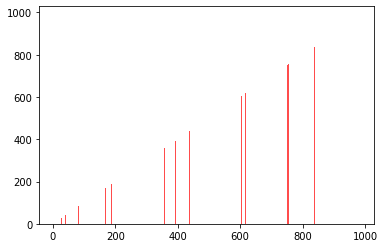

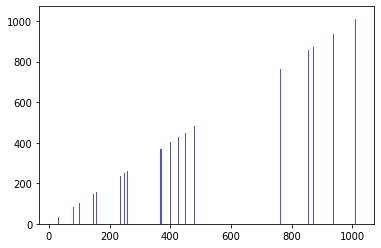

23080 [26, 28, 32, 36, 41, 47, 48, 67, 81, 82, 92, 101, 119, 136, 138, 147, 157, 169, 188, 205, 205, 236, 276, 358, 371, 393, 401, 436, 443, 450, 465, 480, 484, 491, 530, 607, 611, 627, 634, 673, 674, 711, 763, 778, 783, 788, 838, 872, 894, 919, 927, 980, 1021, 1021]
22228 [6, 11, 19, 87, 193, 209, 249, 259, 268, 303, 311, 315, 322, 339, 349, 352, 356, 368, 375, 376, 376, 427, 438, 485, 488, 490, 535, 548, 560, 600, 604, 606, 617, 634, 652, 655, 680, 689, 752, 755, 853, 855, 938, 945, 969, 1010]
delta: 852


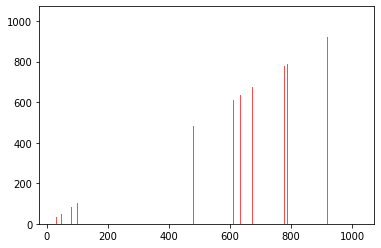

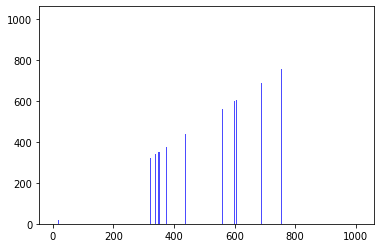

22663 [11, 26, 48, 82, 136, 138, 147, 169, 188, 205, 236, 249, 268, 315, 322, 371, 375, 376, 376, 393, 401, 438, 450, 480, 484, 488, 490, 491, 530, 604, 606, 627, 673, 680, 711, 755, 783, 872, 894, 919, 927, 938, 969, 980, 1021, 1021]
22645 [6, 19, 28, 32, 36, 41, 47, 67, 81, 87, 92, 101, 119, 157, 193, 205, 209, 259, 276, 303, 311, 339, 349, 352, 356, 358, 368, 427, 436, 443, 465, 485, 535, 548, 560, 600, 607, 611, 617, 634, 634, 652, 655, 674, 689, 752, 763, 778, 788, 838, 853, 855, 945, 1010]
delta: 18


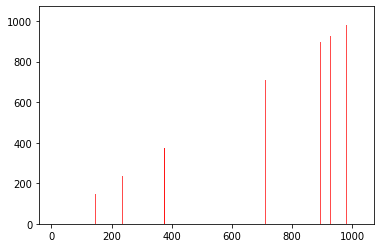

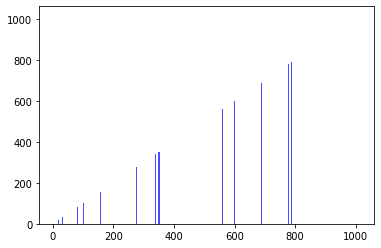

22654 [19, 26, 28, 32, 36, 41, 48, 67, 81, 82, 87, 92, 101, 119, 136, 138, 147, 157, 169, 188, 193, 205, 205, 209, 236, 249, 268, 276, 303, 311, 322, 339, 352, 356, 358, 368, 371, 375, 376, 376, 438, 485, 490, 491, 535, 548, 560, 604, 606, 611, 617, 652, 655, 673, 674, 711, 752, 855, 927, 938, 969, 1021]
22654 [6, 11, 47, 259, 315, 349, 393, 401, 427, 436, 443, 450, 465, 480, 484, 488, 530, 600, 607, 627, 634, 634, 680, 689, 755, 763, 778, 783, 788, 838, 853, 872, 894, 919, 945, 980, 1010, 1021]
delta: 0


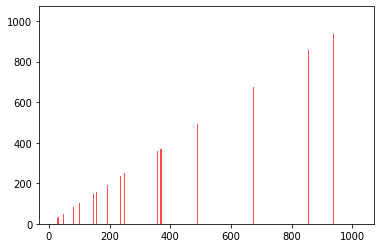

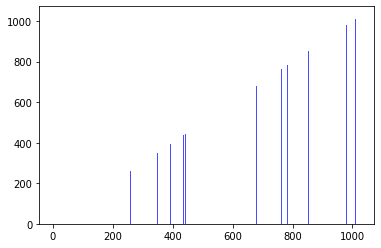

Time 24.125008821487427s


In [90]:
delta = max(S)
ini = time.time()

while True:
    
    tc = peqnp.TheCore(bits=sum(S).bit_length(), key='partitioning', folder='db/')

    slots = tc.int(size=len(S))

    assert abs(sum(tc.zero.iff(slots[i], S[i]) for i in range(len(S))) - sum(tc.zero.iff(-slots[i], S[i]) for i in range(len(S)))) < delta

    if tc.satisfy([slots]):
        A = [S[i] for i in range(len(S)) if slots.binary[i]]
        B = [S[i] for i in range(len(S)) if not slots.binary[i]]
        print(sum(A), A)
        print(sum(B), B)
        delta = abs(sum(A) - sum(B))
        print('delta: {}'.format(delta))
        plot(A, 'r')
        plot(B, 'b')
        if delta == 0:
            break
    else:
        break

end = time.time()
print('Time {}s'.format(end - ini))